 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [16]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [17]:
whale_returns = Path("whale_returns.csv")

In [18]:
# Reading whale returns

Whale_Portfolio = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
Whale_Portfolio.sort_values("Date")
Whale_Portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-02-03,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-04-03,0.002230,0.003241,-0.002534,0.004213
2015-05-03,0.004016,0.004076,0.002355,0.006726
2015-06-03,-0.007905,-0.003574,-0.008481,-0.013098


In [19]:
# Count nulls

Whale_Portfolio.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [20]:
# Drop nulls
Whale_Portfolio = Whale_Portfolio.dropna().copy()
Whale_Portfolio.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [21]:
# Reading algorithmic returns

algo_returns = Path("algo_returns.csv")
Algo_Returns = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
Algo_Returns.sort_values("Date")
Algo_Returns.tail()


,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [22]:
# Count nulls

Algo_Returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [23]:
# Drop nulls

Algo_Returns = Algo_Returns.dropna().copy()
Algo_Returns.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [24]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_history = Path("sp_tsx_history.csv")
SP_TSX_60_Returns = pd.read_csv(sp_tsx_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP_TSX_60_Returns.sort_values("Date")
SP_TSX_60_Returns.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [25]:
# Check Data Types
SP_TSX_60_Returns.dtypes


Close    object
dtype: object

In [26]:
# Fix Data Types
# Convert `order_total` from `object` to `float`

SP_TSX_60_Returns["Close"] = SP_TSX_60_Returns["Close"].str.replace("$", "")
SP_TSX_60_Returns["Close"] = SP_TSX_60_Returns["Close"].str.replace(",", "")
SP_TSX_60_Returns["Close"] = SP_TSX_60_Returns["Close"].astype("float")
SP_TSX_60_Returns.dtypes



Close    float64
dtype: object

In [27]:
# Calculate Daily Returns
SP_TSX_60_Returns = SP_TSX_60_Returns.pct_change()
SP_TSX_60_Returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [28]:
# Drop nulls

SP_TSX_60_Returns = SP_TSX_60_Returns.dropna().copy()
SP_TSX_60_Returns.isnull().sum()


Close    0
dtype: int64

In [29]:
# Rename `Close` Column to be specific to this portfolio.

columns = ["SP TSX 60 Daily Return"]
SP_TSX_60_Returns.columns = columns
SP_TSX_60_Returns.head()



,SP TSX 60 Daily Return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [30]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

Combined_Returns = pd.concat([Whale_Portfolio, Algo_Returns,SP_TSX_60_Returns], axis="columns", join="inner")
Combined_Returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-06-03,-0.007905,-0.003574,-0.008481,-0.013098,-0.005906,0.007484,0.003306
2015-09-03,0.000582,0.004225,0.005843,-0.001652,0.001383,-0.001680,0.003777
2015-11-03,0.004012,0.005163,0.003312,-0.001147,0.019469,0.000629,0.006408
2015-12-03,0.008265,0.010272,0.013117,0.010801,0.007114,-0.013703,-0.010335


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

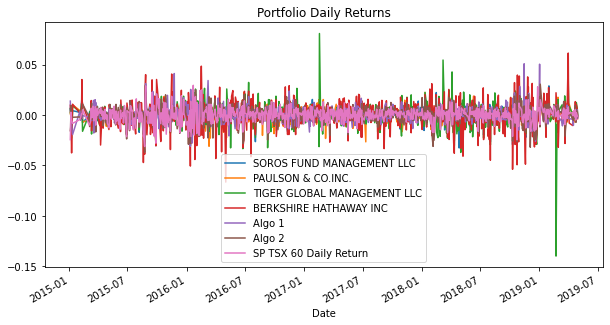

In [16]:
# Plot daily returns of all portfolios

Combined_Returns.plot(figsize=(10, 5), title='Portfolio Daily Returns')


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

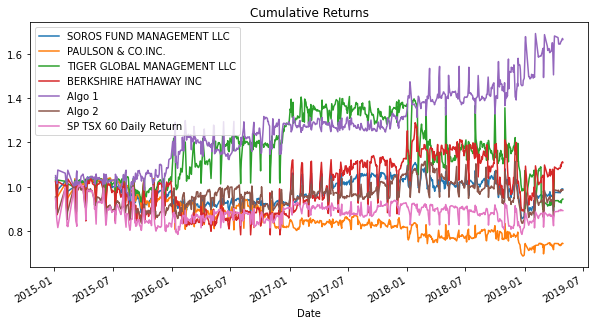

In [33]:
# Calculate cumulative returns of all portfolios

Cumulative_Returns = (1 + Combined_Returns).cumprod()

# Plot cumulative returns

Cumulative_Returns.plot(figsize=(10, 5), title='Cumulative Returns')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'SP TSX 60 Box Plot'}>

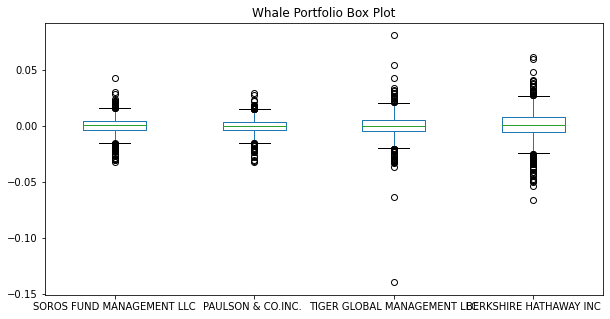

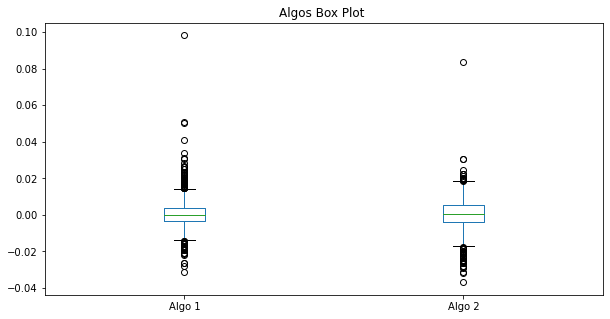

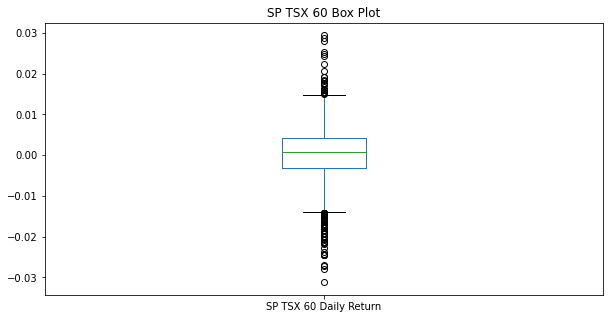

In [34]:
# Box plot to visually show risk

Whale_Portfolio.plot.box (figsize=(10, 5), title='Whale Portfolio Box Plot')
Algo_Returns.plot.box (figsize=(10, 5), title='Algos Box Plot ')
SP_TSX_60_Returns.plot.box (figsize=(10, 5), title='SP TSX 60 Box Plot')



### Calculate Standard Deviations

In [38]:
# Calculate the daily standard deviations of all portfolios

All_Portfolio_Returns = pd.concat([Whale_Portfolio, Algo_Returns, SP_TSX_60_Returns], axis="columns", join="inner")
All_Portfolio_Returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-06-03,-0.007905,-0.003574,-0.008481,-0.013098,-0.005906,0.007484,0.003306
2015-09-03,0.000582,0.004225,0.005843,-0.001652,0.001383,-0.001680,0.003777
2015-11-03,0.004012,0.005163,0.003312,-0.001147,0.019469,0.000629,0.006408
2015-12-03,0.008265,0.010272,0.013117,0.010801,0.007114,-0.013703,-0.010335


In [43]:
All_Portfolio_Returns_daily_std = All_Portfolio_Returns.std()
All_Portfolio_Returns_daily_std


SOROS FUND MANAGEMENT LLC      0.007950
PAULSON & CO.INC.              0.006975
TIGER GLOBAL MANAGEMENT LLC    0.011085
BERKSHIRE HATHAWAY INC         0.013021
Algo 1                         0.007606
Algo 2                         0.008370
SP TSX 60 Daily Return         0.007119
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [44]:
# Calculate  the daily standard deviation of S&P TSX 60

SP_TSX_std = All_Portfolio_Returns['SP TSX 60 Daily Return'].std()

# Determine which portfolios are riskier than the S&P TSX 60
 
All_Portfolio_Returns_daily_std > SP_TSX_std



SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP TSX 60 Daily Return         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)

All_Portfolio_annualised_std = All_Portfolio_Returns_daily_std * np.sqrt(252)
All_Portfolio_annualised_std



SOROS FUND MANAGEMENT LLC      0.126197
PAULSON & CO.INC.              0.110728
TIGER GLOBAL MANAGEMENT LLC    0.175974
BERKSHIRE HATHAWAY INC         0.206704
Algo 1                         0.120744
Algo 2                         0.132877
SP TSX 60 Daily Return         0.113010
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day Std'}, xlabel='Date'>

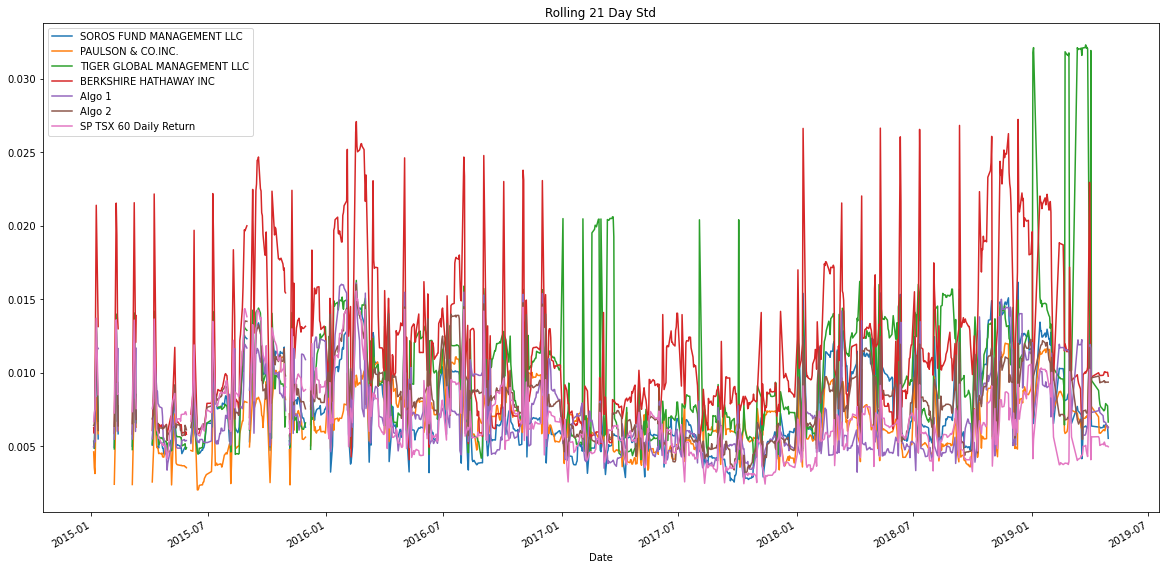

In [47]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

Rolling_std = All_Portfolio_Returns.rolling(window=21).std()

# Plot the rolling standard deviation

Rolling_std.plot(figsize=(20,10),title='Rolling 21 Day Std')


### Calculate and plot the correlation

In [50]:
# Calculate the correlation

correlation = All_Portfolio_Returns.corr()


# Display correlation matrix
correlation.style.background_gradient(cmap='summer')


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return
SOROS FUND MANAGEMENT LLC,1.000000,0.707963,0.558281,0.754574,0.266481,0.592810,0.522596
PAULSON & CO.INC.,0.707963,1.000000,0.439721,0.563597,0.205575,0.465056,0.392112
TIGER GLOBAL MANAGEMENT LLC,0.558281,0.439721,1.000000,0.410363,0.119904,0.365073,0.352908
BERKSHIRE HATHAWAY INC,0.754574,0.563597,0.410363,1.000000,0.226451,0.460978,0.424329
Algo 1,0.266481,0.205575,0.119904,0.226451,1.000000,0.277425,0.294740
Algo 2,0.592810,0.465056,0.365073,0.460978,0.277425,1.000000,0.740891
SP TSX 60 Daily Return,0.522596,0.392112,0.352908,0.424329,0.294740,0.740891,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta - Algo 1 to S&P 60 TSX'}, xlabel='Date'>

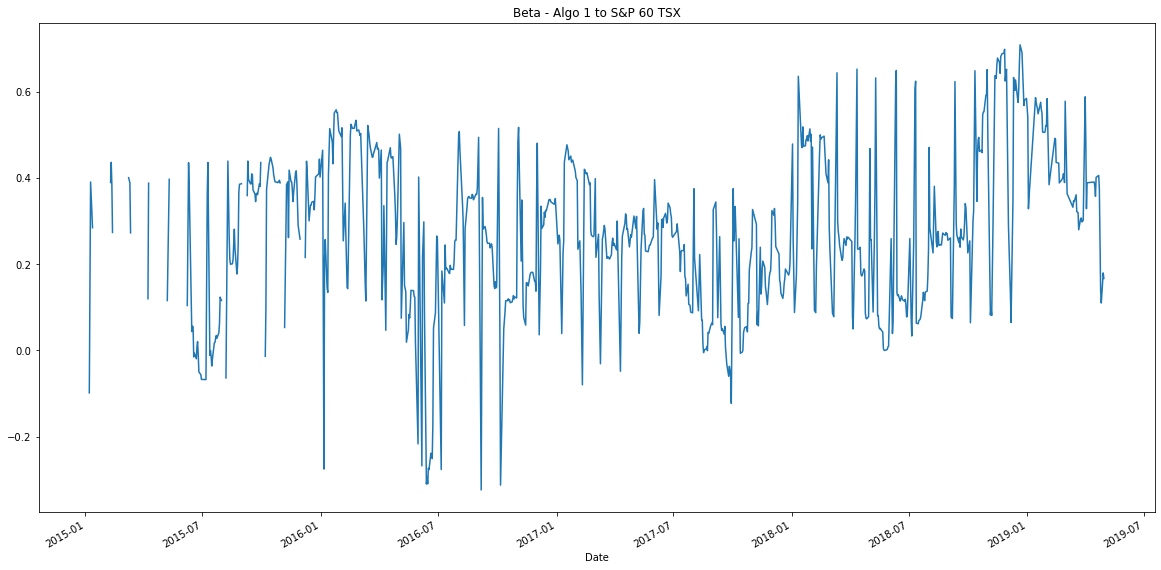

In [53]:
# Calculate covariance of a single portfolio

Algo_Returns_Covariance = All_Portfolio_Returns['Algo 1'].rolling(window=60).cov(All_Portfolio_Returns['SP TSX 60 Daily Return'])

# Calculate variance of S&P TSX

SP_TSX_variance = All_Portfolio_Returns['SP TSX 60 Daily Return'].rolling(window=60).var()

# Computing beta

Beta = Algo_Returns_Covariance / SP_TSX_variance

# Plot beta trend

Beta.plot(figsize=(20,10),title='Beta - Algo 1 to S&P 60 TSX')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponetially Weighted Average - All Portfolios'}, xlabel='Date'>

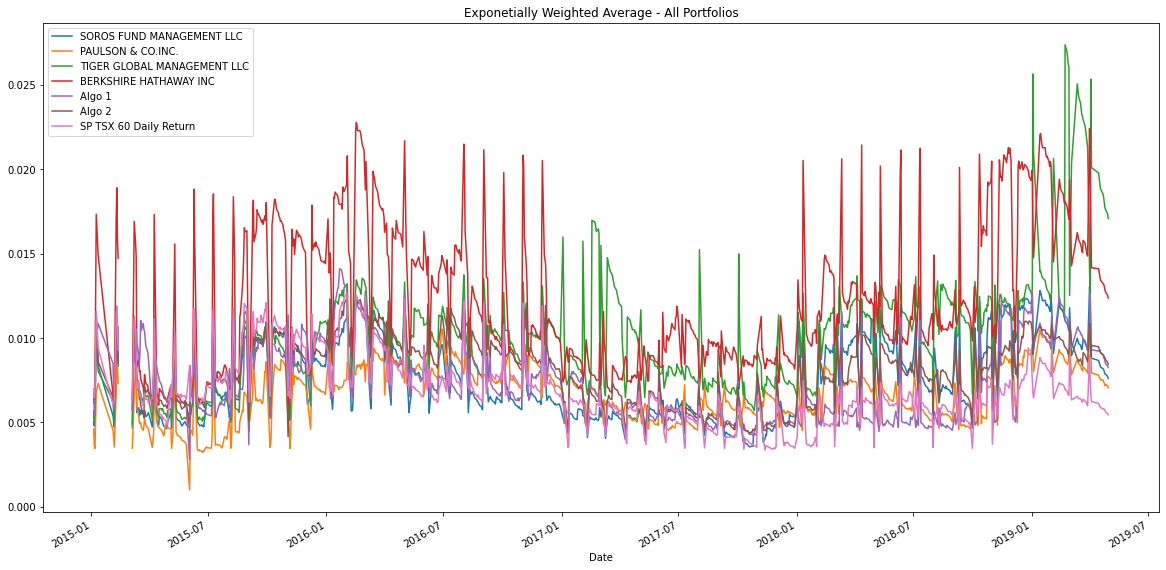

In [52]:
# Use `ewm` to calculate the rolling window

All_Portfolio_Returns.ewm(halflife=21).std().plot(figsize=(20,10),title='Exponetially Weighted Average - All Portfolios')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Annualized Sharpe Ratios

sharpe_ratios = (All_Portfolio_Returns.mean() * 252) / (All_Portfolio_Returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.040444
PAULSON & CO.INC.             -0.690550
TIGER GLOBAL MANAGEMENT LLC   -0.001158
BERKSHIRE HATHAWAY INC         0.243828
Algo 1                         1.240124
Algo 2                         0.036006
SP TSX 60 Daily Return        -0.224149
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - All Portfolios'}>

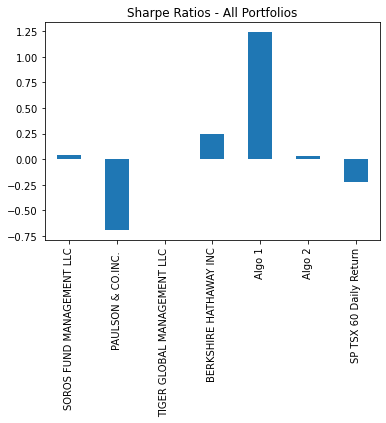

In [57]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title= "Sharpe Ratios - All Portfolios")



### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

#The Algo 1 portfolios clearly outperform the S&P TSX 60 and Whale Portfolios. Algo 2 outperforms all portfolios with the exception of Berkshire Hathaway Inc Portfolio. The Sharpe Rations show that after adjustments for a risk free rate and volatility Algo strategies are "for the most part" provide superior investments strategies.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [58]:
# Reading data from 1st stock

shop_historical = Path("shop_historical.csv")
Shopify_Values = pd.read_csv(shop_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
Shopify_Values.sort_values("Date")
Shopify_Values.head()


,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [59]:
# Reading data from 2nd stock

otex_historical = Path("otex_historical.csv")
Otex_Values = pd.read_csv(otex_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
Otex_Values.sort_values("Date")
Otex_Values.head()


,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [60]:
# Reading data from 3rd stock

l_historical = Path("l_historical.csv")
Loblaw_Values = pd.read_csv(l_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
Loblaw_Values.sort_values("Date")
Loblaw_Values.head()


,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [61]:
# Combine all stocks in a single DataFrame

All_Stock_Values = pd.concat([Shopify_Values, Otex_Values, Loblaw_Values], axis="rows", join="inner")
All_Stock_Values.sort_values("Date")
All_Stock_Values.head()


,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [62]:
# Reset Date index

All_Stock_Values = All_Stock_Values.reset_index()
All_Stock_Values.head()


,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51


In [63]:
# Reorganize portfolio data by having a column per symbol

All_Stock_Values = All_Stock_Values.pivot_table(values="Close", index="Date", columns="Symbol") #drop(columns=["Symbol"])
All_Stock_Values.head()



Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [64]:
# Calculate daily returns


All_Stock_Values = All_Stock_Values.pct_change()

All_Stock_Values.head()




Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


In [65]:
# Drop NAs

All_Stock_Values = All_Stock_Values.dropna().copy()
All_Stock_Values.isnull().sum()


Symbol
L       0
OTEX    0
SHOP    0
dtype: int64

In [66]:
# Display sample data

All_Stock_Values.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [68]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

Weighted_Stock_Returns = All_Stock_Values.dot(weights)

# Display sample data

Weighted_Stock_Returns.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [69]:
# Join your returns DataFrame to the original returns DataFrame

All_Portfolio_Returns['Çustom'] = Weighted_Stock_Returns
All_Portfolio_Returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return,Çustom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-06-03,-0.007905,-0.003574,-0.008481,-0.013098,-0.005906,0.007484,0.003306,NaN
2015-09-03,0.000582,0.004225,0.005843,-0.001652,0.001383,-0.001680,0.003777,NaN
2015-11-03,0.004012,0.005163,0.003312,-0.001147,0.019469,0.000629,0.006408,NaN
2015-12-03,0.008265,0.010272,0.013117,0.010801,0.007114,-0.013703,-0.010335,NaN


In [70]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

All_Portfolio_Returns = All_Portfolio_Returns.dropna().copy()
All_Portfolio_Returns.isnull().sum()
                                            


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP TSX 60 Daily Return         0
Çustom                         0
dtype: int64

In [71]:
All_Portfolio_Returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return,Çustom
Date,,,,,,,,
2018-02-01,0.014546,0.015045,-0.004784,0.031017,-0.004299,0.003629,-0.005689,0.032136
2018-03-01,0.004658,0.000027,0.001979,0.005676,0.005933,-0.006601,-0.003156,-0.012220
2018-05-01,0.004072,0.000823,0.000737,0.022023,0.001589,0.002106,0.000708,-0.010016
2018-08-01,0.004473,-0.003739,0.005085,0.003435,0.006178,-0.002942,-0.003483,-0.010544
2018-10-01,-0.002753,-0.002290,-0.005720,-0.004781,-0.002388,-0.001319,0.001947,-0.016164


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`

All_Portfolio_Returns_Daily_std = All_Portfolio_Returns.std()

All_Portfolio_Returns_Daily_std



SOROS FUND MANAGEMENT LLC      0.009544
PAULSON & CO.INC.              0.007398
TIGER GLOBAL MANAGEMENT LLC    0.014161
BERKSHIRE HATHAWAY INC         0.014918
Algo 1                         0.007905
Algo 2                         0.008808
SP TSX 60 Daily Return         0.006414
Çustom                         0.014620
dtype: float64

In [64]:
All_Portfolio_annualised_std = All_Portfolio_Returns_Daily_std * np.sqrt(252)
All_Portfolio_annualised_std

SOROS FUND MANAGEMENT LLC      0.151504
PAULSON & CO.INC.              0.117435
TIGER GLOBAL MANAGEMENT LLC    0.224804
BERKSHIRE HATHAWAY INC         0.236816
Algo 1                         0.125495
Algo 2                         0.139827
SP TSX 60 Daily Return         0.101812
Çustom                         0.232085
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day Std - All Portfolios'}, xlabel='Date'>

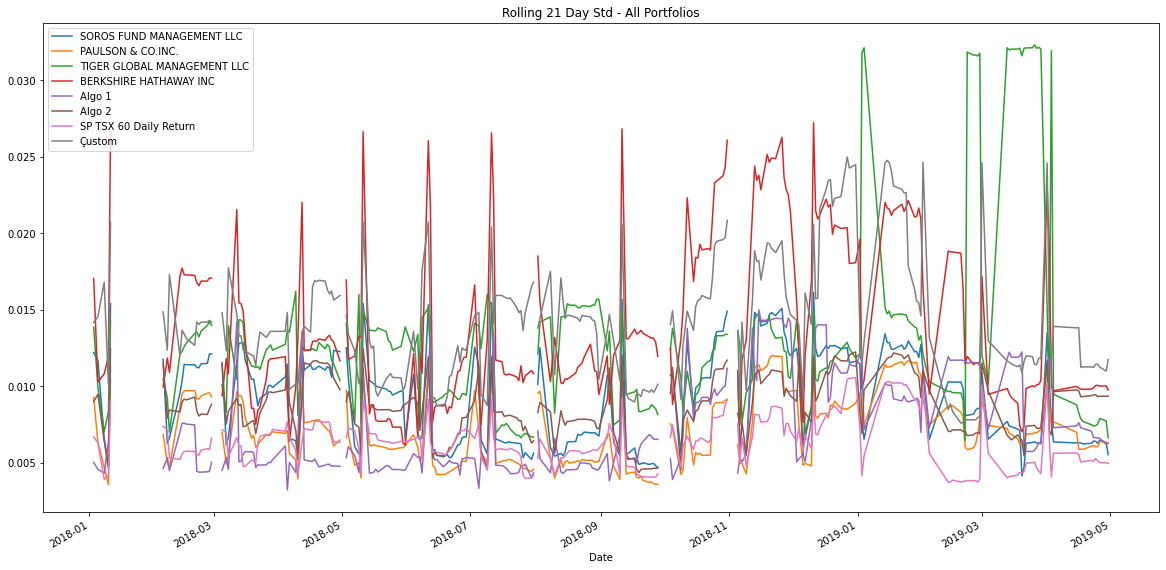

In [74]:
# Calculate rolling standard deviation


Rolling_std = All_Portfolio_Returns.rolling(window=21).std()

# Plot the rolling standard deviation

Rolling_std.plot(figsize=(20,10),title='Rolling 21 Day Std - All Portfolios')



### Calculate and plot the correlation

In [75]:
# Calculate and plot the correlation

correlation = All_Portfolio_Returns.corr()


# Display correlation matrix
correlation.style.background_gradient(cmap='winter')




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return,Çustom
SOROS FUND MANAGEMENT LLC,1.000000,0.772193,0.513494,0.794687,0.253659,0.549221,0.443152,0.343017
PAULSON & CO.INC.,0.772193,1.000000,0.514711,0.667637,0.231370,0.536642,0.439008,0.232638
TIGER GLOBAL MANAGEMENT LLC,0.513494,0.514711,1.000000,0.356097,0.042880,0.308284,0.305945,0.146751
BERKSHIRE HATHAWAY INC,0.794687,0.667637,0.356097,1.000000,0.248094,0.479309,0.409125,0.433086
Algo 1,0.253659,0.231370,0.042880,0.248094,1.000000,0.335609,0.287000,0.214349
Algo 2,0.549221,0.536642,0.308284,0.479309,0.335609,1.000000,0.763432,0.566456
SP TSX 60 Daily Return,0.443152,0.439008,0.305945,0.409125,0.287000,0.763432,1.000000,0.567004
Çustom,0.343017,0.232638,0.146751,0.433086,0.214349,0.566456,0.567004,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [68]:
All_Portfolio_Returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60 Daily Return,Çustom
Date,,,,,,,,
2018-02-01,0.014546,0.015045,-0.004784,0.031017,-0.004299,0.003629,-0.005689,0.032136
2018-03-01,0.004658,0.000027,0.001979,0.005676,0.005933,-0.006601,-0.003156,-0.012220
2018-05-01,0.004072,0.000823,0.000737,0.022023,0.001589,0.002106,0.000708,-0.010016
2018-08-01,0.004473,-0.003739,0.005085,0.003435,0.006178,-0.002942,-0.003483,-0.010544
2018-10-01,-0.002753,-0.002290,-0.005720,-0.004781,-0.002388,-0.001319,0.001947,-0.016164


<AxesSubplot:title={'center':'Beta - All Stock Values to SP TSX 60'}, xlabel='Date'>

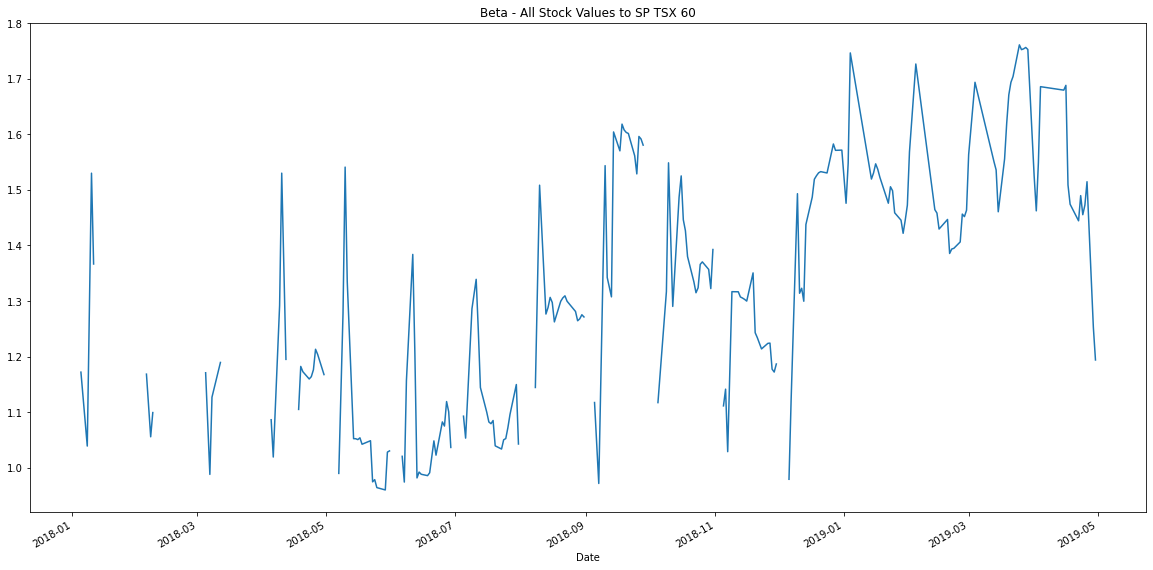

In [77]:
# Calculate and plot Beta

All_Stock_Values_Covariance = All_Portfolio_Returns['Çustom'].rolling(window=60).cov(All_Portfolio_Returns['SP TSX 60 Daily Return'])

SP_TSX_variance = All_Portfolio_Returns['SP TSX 60 Daily Return'].rolling(window=60).var()

Beta = All_Stock_Values_Covariance / SP_TSX_variance

# Plot beta trend

Beta.plot(figsize=(20,10),title='Beta - All Stock Values to SP TSX 60')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualzied Sharpe Ratios

Total_Returns_sharpe_ratios = (All_Portfolio_Returns.mean() * 252) / (All_Portfolio_Returns.std() * np.sqrt(252))
Total_Returns_sharpe_ratios


SOROS FUND MANAGEMENT LLC     -0.228260
PAULSON & CO.INC.             -0.660736
TIGER GLOBAL MANAGEMENT LLC   -1.361766
BERKSHIRE HATHAWAY INC         0.119869
Algo 1                         1.725215
Algo 2                        -0.468325
SP TSX 60 Daily Return        -0.344500
Çustom                         1.211142
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

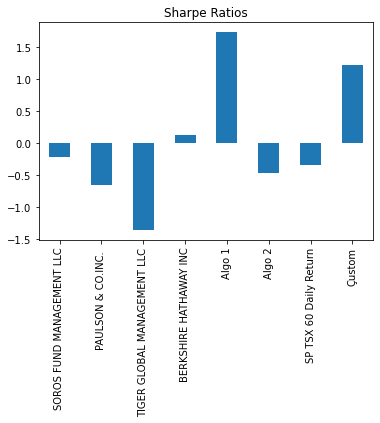

In [71]:
# Visualize the sharpe ratios as a bar plot

Total_Returns_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")



### How does your portfolio do?

Write your answer here!

In [ ]:
# Based on Sharpe Ratio, my Custom Portfolio performs quite well being ranked second to Algo 1 portfolio. This means that my Custom Portfolio provides a highly competitive rate of return when adjusted for its Standard Deviation (volatility) and an appropriate risk-free rate. 
#Indeed, most portfolios have a negative Sharpe Ratio meaning that the return (based on this measurement) is not justified by the risk taken in the portfolio. 
#An important note is that my Custom Portfolio outperforms the SP TSX 60 Daily index. By outperforming the index, I can easily justify my “mega portfolio management fees”. 

